Read the profiles from the CTD stored in CSV files and represent them on a graph.

In [1]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

## User inputs

Set the directories where the data files are available.

In [2]:
"""
datadirs = ['/home/ctroupin/Presentations/2017/201705_StageCalvi/StageCalvi2017/CTDs/Stareso10m/',
            '/home/ctroupin/Presentations/2017/201705_StageCalvi/StageCalvi2017/CTDs/Stareso40m/',
            '/home/ctroupin/Presentations/2017/201705_StageCalvi/StageCalvi2017/CTDs/TC100']
"""
datadirs = ['/home/ctroupin/Data/Stareso/CTD/201705/']
figdir = './figures/'
if not os.path.exists(figdir):
    os.makedirs(figdir)

## Create profile object

In [3]:
class CTDprofile(object):
    
    def __init__(self, filename, varnames=None, varunits=None, varvalues=None):
        self.filename = filename
        self.varnames = varnames
        self.varunits = varunits
        self.varvalues = varvalues
        
    def read_from(self):
        """Read the profile (variable names, units and values) from the file
        """
        with open(self.filename, 'r') as f:
            
            self.varnames = []
            self.varunits = {}
            self.varprofile = {}
            
            # Read 1st line
            line = f.readline()
            
            # Read comment lines (metadata)
            while line[0] == '%':
                line = f.readline().rstrip('\n')
                
            # Extract variable names and units 
            for ii in line.split(','):
                m = re.search(r'(\w+) \((.+)\)', ii)
                if m:
                    self.varnames.append(m.group(1))
                    self.varunits[m.group(1)] = m.group(2)
                    
            nvars = len(self.varnames)
            
            # Create dictionnary of variable profiles:
            # Key = variable name
            # Value = list of measured value
            for i in range(0, nvars):
                self.varprofile[self.varnames[i]] = []

            line = f.readline().rstrip('\n')
            while line:
                for i in range(0, nvars):
                    self.varprofile[self.varnames[i]].append(float(line.split(',')[i]))
                line = f.readline().rstrip('\n')
                
        plt.plot(self.varprofile[varname1], self.varprofile[varname2], **kwargs)
        plt.xlabel(varname1)
        plt.ylabel(varname2)

# Generate list of files to read

In [4]:
datafilelist = []
for datadir in datadirs:
    datafilelist.extend(sorted(glob.glob(os.path.join(datadir, "*csv"))))
    print("Data files: {0}".format(len(datafilelist)))

Data files: 9


# Loop on the files and make plots
## Read the profiles and store in a list

In [6]:
ProfileList = []
for datafile in datafilelist:
    print(datafile)
    Profile = CTDprofile(datafile)
    Profile.read_from()
    ProfileList.append(Profile)

/home/ctroupin/Data/Stareso/CTD/201705/DCE40m 032117_072130.csv


ValueError: could not convert string to float: '03/21/2017 10:58:55 0 Deployment Site 0 2.5 14.888 46.1073 57.1442 38.04 98.4 7.88 4.85 -0.5 -2 -0.57 -1.6 0.0048 0.048'

## T-S diagram

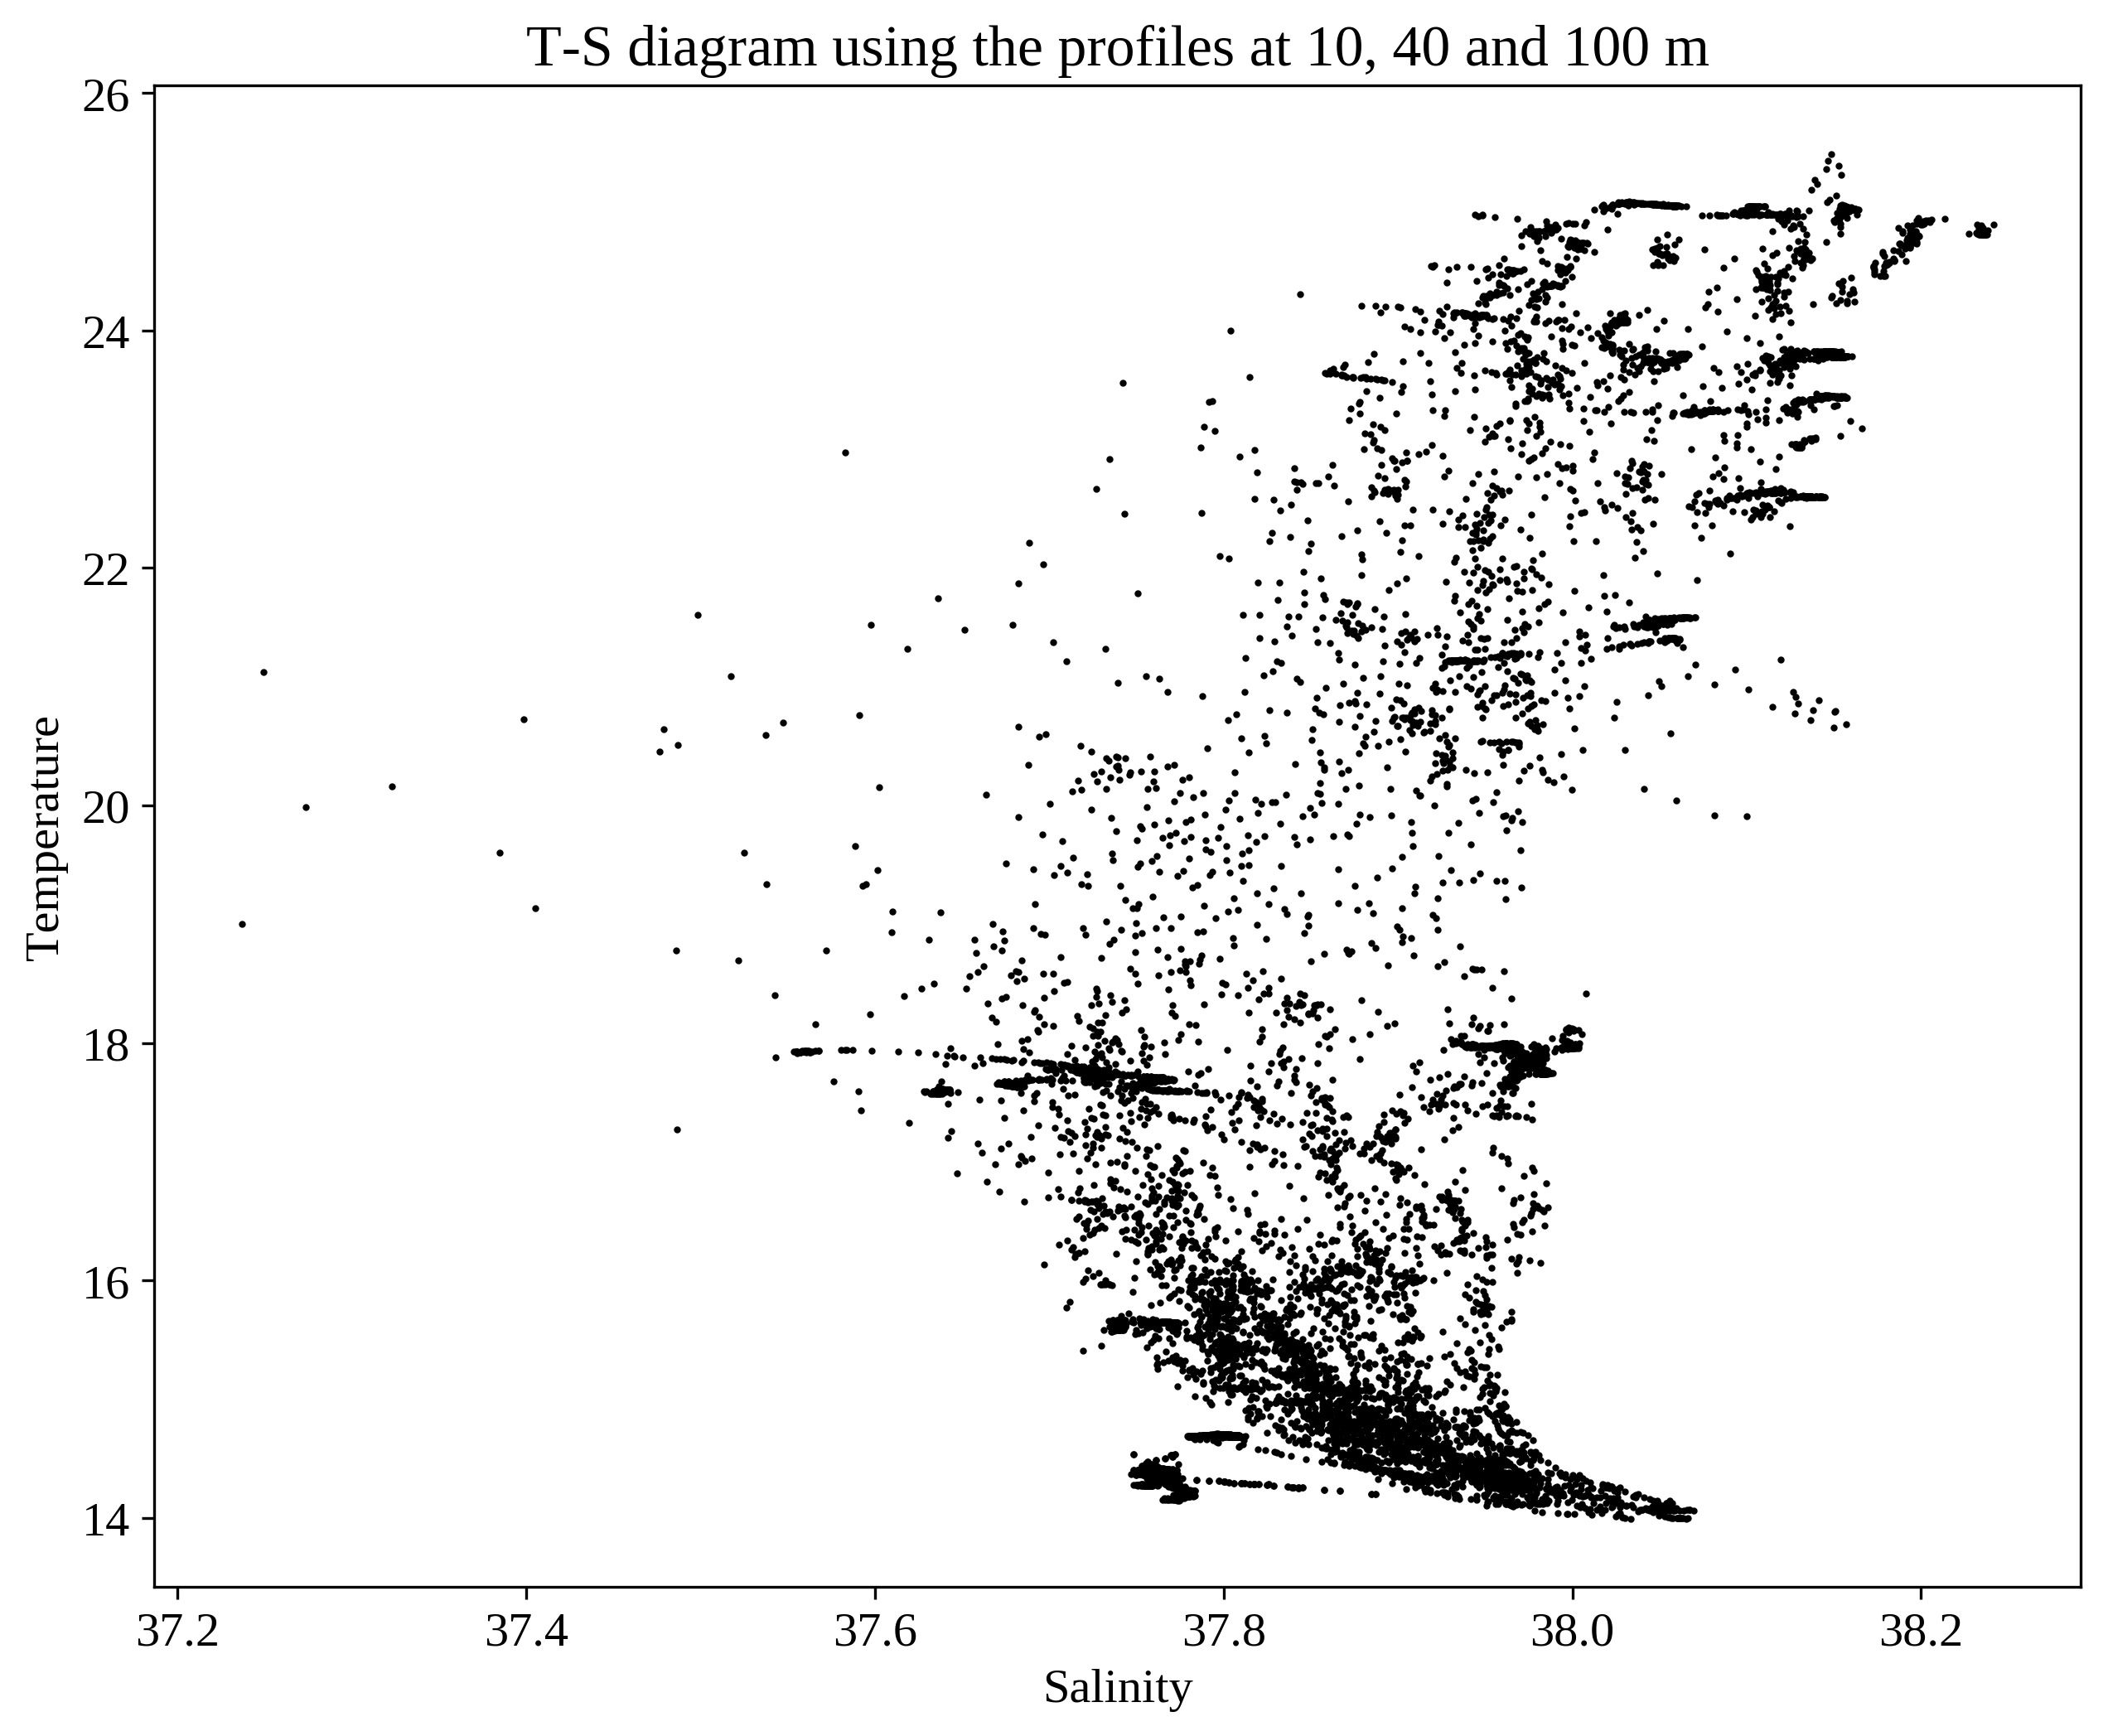

In [37]:
fig = plt.figure()
for Profile in ProfileList:
    Profile.make_plot('Salinity', 'Temperature',
                      color='k', marker='o', markersize=1, linestyle='')
plt.title('T-S diagram using the profiles at 10, 40 and 100 m')
plt.show()
plt.close()

## All the temperature profiles

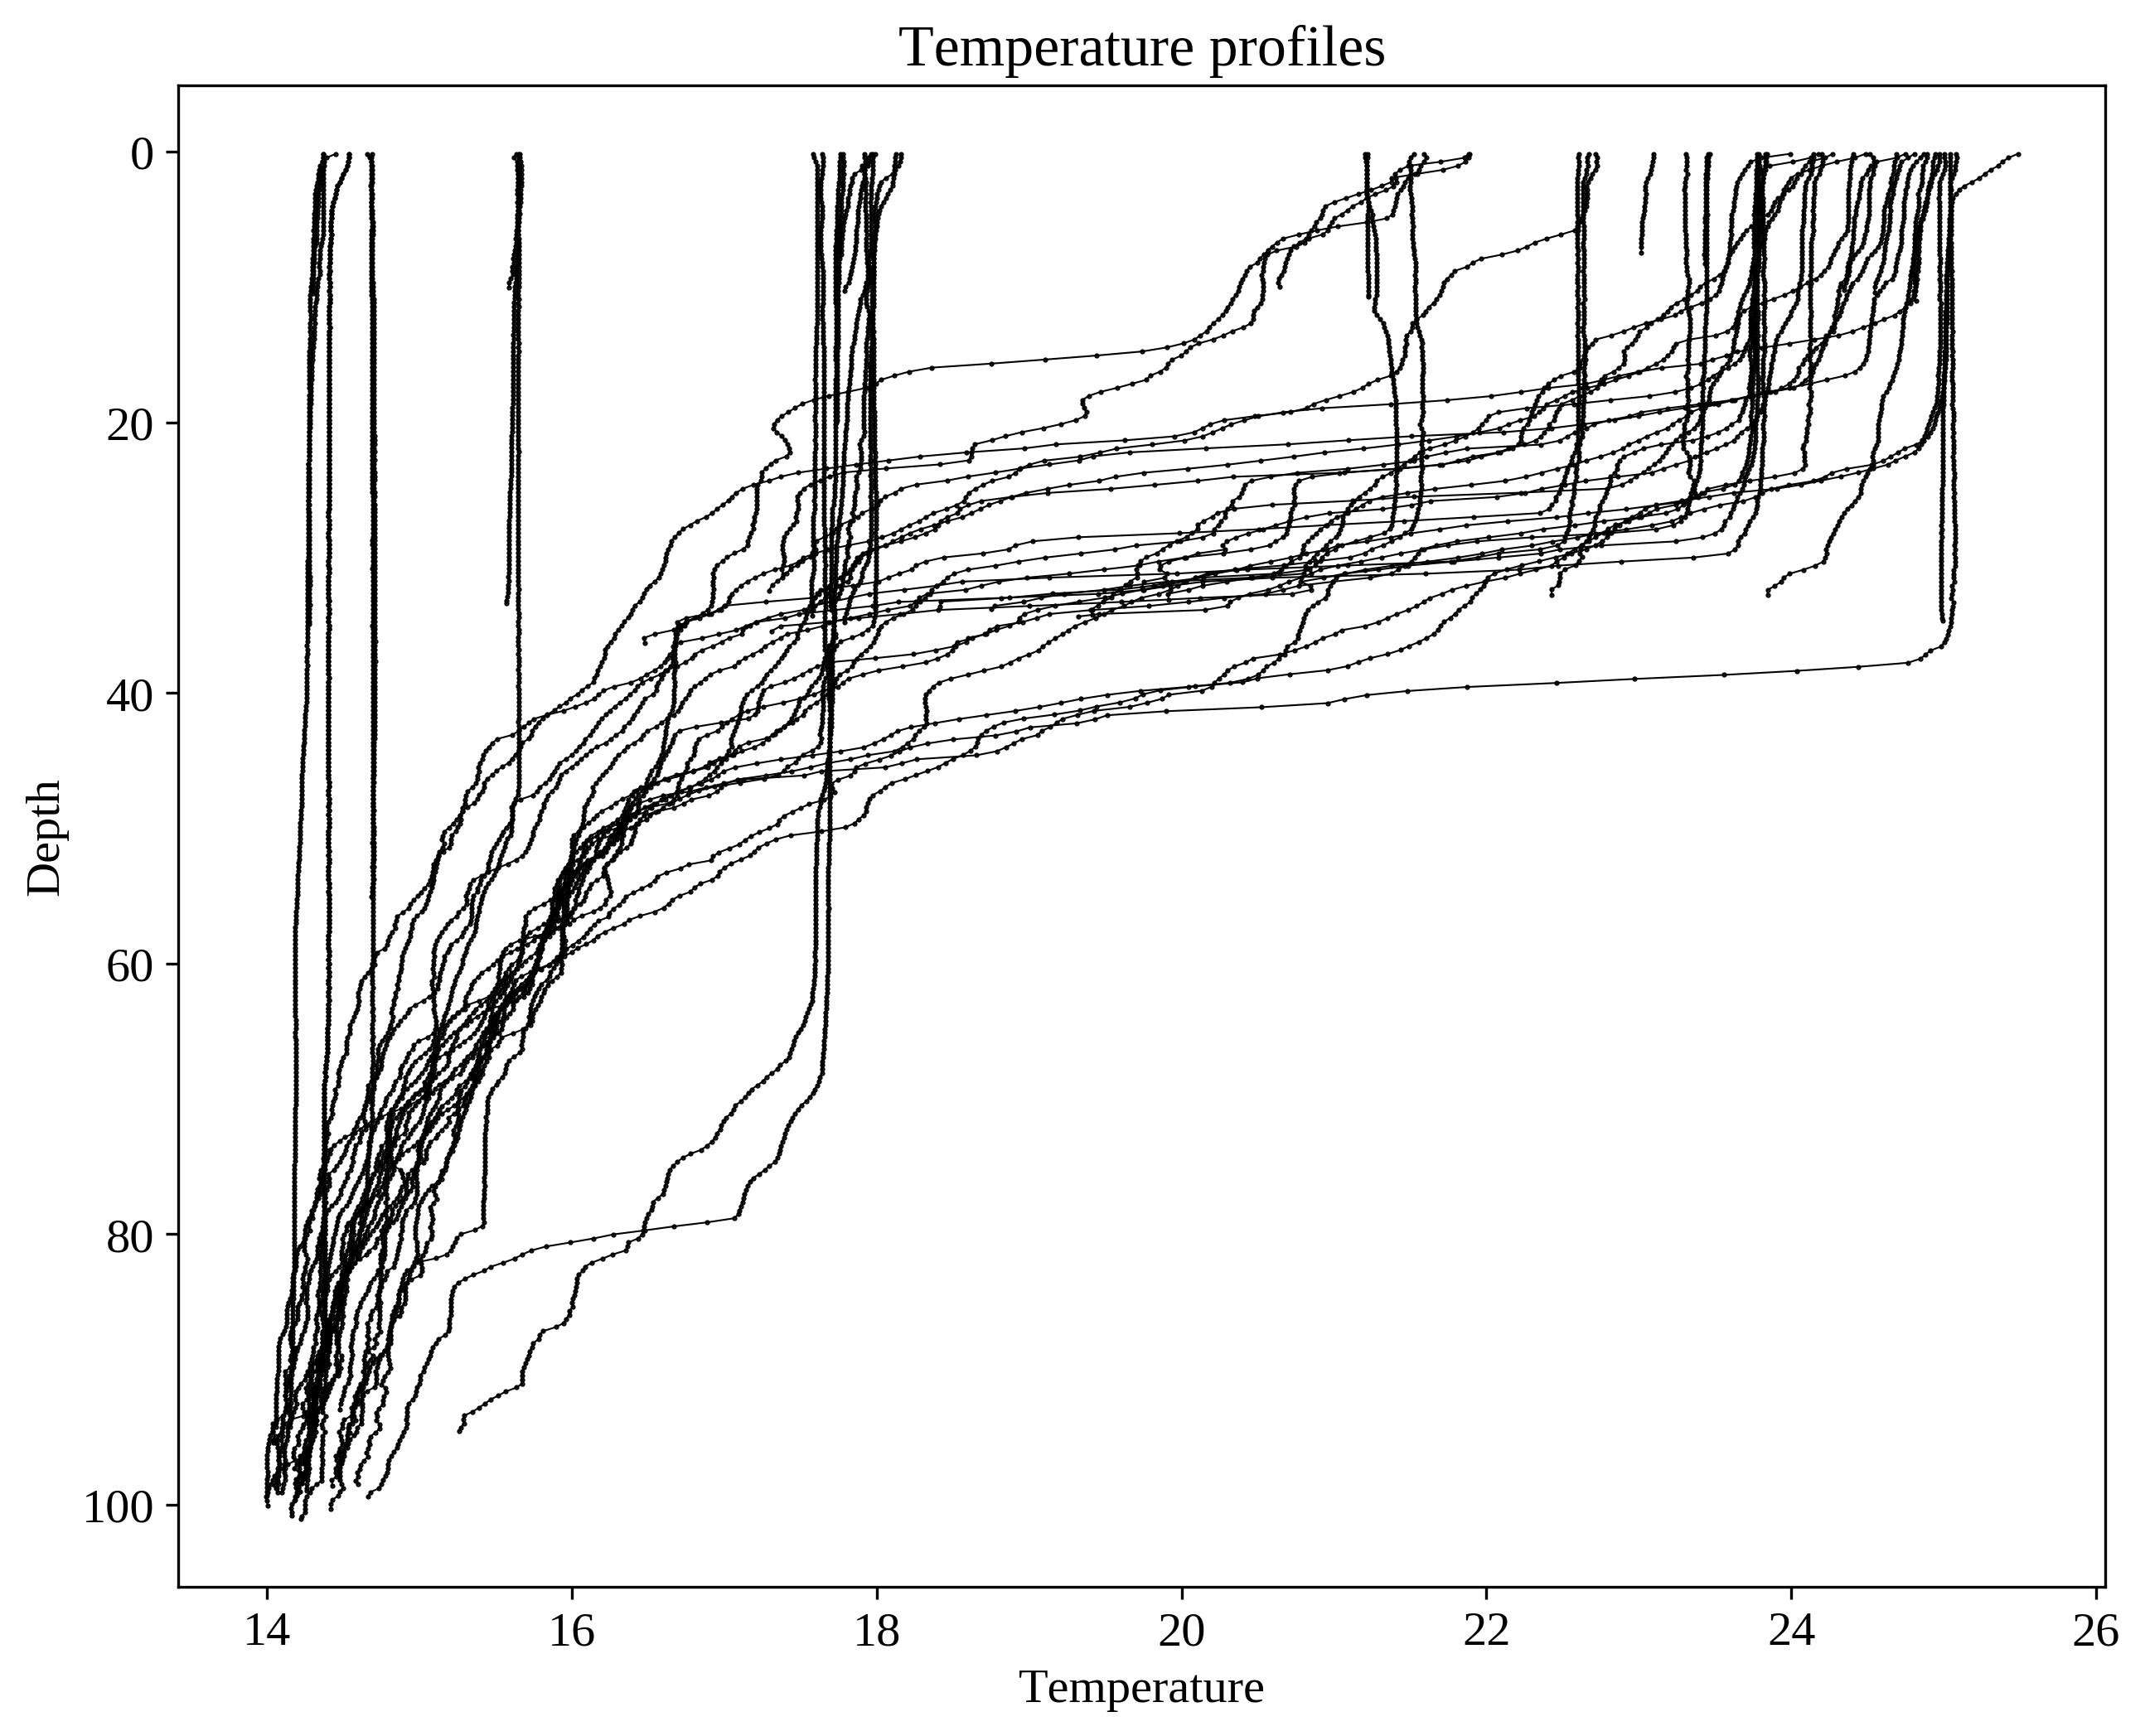

In [48]:
fig = plt.figure()
for datafile in datafilelist:
    Profile = CTDprofile(datafile)
    Profile.read_from()
    Profile.varnames
    Profile.make_plot('Temperature', 'Depth',
                      color='k', marker='o', markersize=.5, linestyle='-', linewidth=.5)
plt.gca().invert_yaxis()
plt.title('Temperature profiles')
plt.show()
plt.close()

## All the salinity profiles